# Modelos de Regresion Lineal

#### Modelos con datos simulados y = b+wx

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [224]:
# Generar los predictores
x = 1.5 + 2.5*np.random.randn(100)

In [225]:
# Generar los errores
res = 0 + 0.8*np.random.randn(100)

In [226]:
# Generar las etiquetas predichas
y_pred = 5 + 1.9*x

In [227]:
# Etiquetas actuales
y_real = 5 + 1.9*x+res

In [228]:
X = x.tolist()
y = y_real.tolist()
y_predict = y_pred.tolist()

In [229]:
data = pd.DataFrame({
    "Predictores":X,
    "Etiqueta": y,
    "Predicciones": y_predict
})

data.head()

,Predictores,Etiqueta,Predicciones
0,-2.766803,1.384034,-0.256926
1,0.980101,7.296881,6.862191
2,5.956189,16.298159,16.316760
3,4.048661,12.229217,12.692456
4,-1.060623,2.411641,2.984816


In [230]:
y_mean = [np.mean(data.Etiqueta) for i in range(1,len(data.Predictores)+1)]

Text(0.5, 1.0, 'Valor actual vs Predicciones')

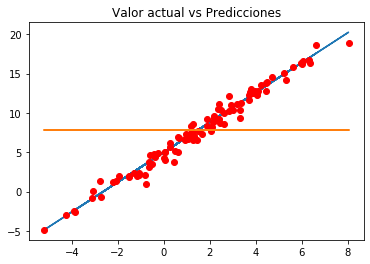

In [231]:
%matplotlib inline
plt.plot(data.Predictores, data.Predicciones)
plt.plot(data.Predictores, data.Etiqueta, 'ro')
plt.plot(data.Predictores, y_mean)
plt.title("Valor actual vs Predicciones")

In [232]:
#Investigar esto no lo comprendo bien
data['SSR'] = (data.Predictores-np.mean(data.Etiqueta))**2
data['SSD'] = (data.Predictores- data.Etiqueta)**2
data['SST'] = (data.Etiqueta - np.mean(data.Etiqueta))**2

SSR = sum(data.SSR)
SSD = sum(data.SSD)
SST = sum(data.SST)

In [233]:
SSR, SSD, SST

(4637.224840478565, 4557.992266816035, 2607.422627674923)

In [234]:
R2 = SSR/SST
R2

1.778470736297033

In [235]:
data.head()

,Predictores,Etiqueta,Predicciones,SSR,SSD,SST
0,-2.766803,1.384034,-0.256926,111.375870,17.229448,40.993794
1,0.980101,7.296881,6.862191,46.329433,39.901720,0.239896
2,5.956189,16.298159,16.316760,3.350672,106.956340,72.445391
3,4.048661,12.229217,12.692456,13.972737,66.921499,19.736194
4,-1.060623,2.411641,2.984816,78.274656,12.056618,28.890973


(array([ 1.,  9., 12., 11., 16., 20., 12., 12.,  3.,  4.]),
 array([-12.06698923, -10.89616165,  -9.72533407,  -8.55450649,
         -7.38367892,  -6.21285134,  -5.04202376,  -3.87119618,
         -2.70036861,  -1.52954103,  -0.35871345]),
 <a list of 10 Patch objects>)

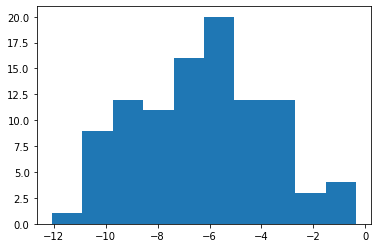

In [236]:
plt.hist(data.Predictores- data.Etiqueta)

# Opteniendo la recta de la regresion

In [237]:
X_mean = np.mean(data.Predictores)
y_mean = np.mean(data.Etiqueta)
X_mean, y_mean

(1.517981491548015, 7.786673381440417)

In [238]:
data['beta_n'] = (data.Predictores - X_mean)*(data.Etiqueta-y_mean)
data['beta_d'] = (data.Predictores- X_mean)**2

In [239]:
beta = sum(data.beta_n)/sum(data.beta_d)

In [240]:
alpha = y_mean - beta*X_mean

In [241]:
alpha, beta

(4.904793268032907, 1.898494895658189)

beta seria mi W o pendiente / alpha seria mi b o interseccion eje y

In [242]:
data["y_model"] = alpha + beta*data.Predictores

In [243]:
data.head()

,Predictores,Etiqueta,Predicciones,SSR,SSD,SST,beta_n,beta_d,y_model
0,-2.766803,1.384034,-0.256926,111.375870,17.229448,40.993794,27.433933,18.359381,-0.347969
1,0.980101,7.296881,6.862191,46.329433,39.901720,0.239896,0.263450,0.289316,6.765509
2,5.956189,16.298159,16.316760,3.350672,106.956340,72.445391,37.775744,19.697689,16.212588
3,4.048661,12.229217,12.692456,13.972737,66.921499,19.736194,11.242654,6.404338,12.591155
4,-1.060623,2.411641,2.984816,78.274656,12.056618,28.890973,13.860083,6.649202,2.891206


In [244]:
SSR = sum((data.y_model-y_mean)**2)
SSD = sum((data.y_model-data.Etiqueta)**2)
SST = sum((data.Etiqueta - y_mean)**2)

SSR, SSD, SST

(2550.30059306634, 57.12203460858508, 2607.422627674923)

In [245]:
R2 = SSR/SST
R2

0.9780925293804327

Text(0.5, 1.0, 'Valor actual vs Predicciones')

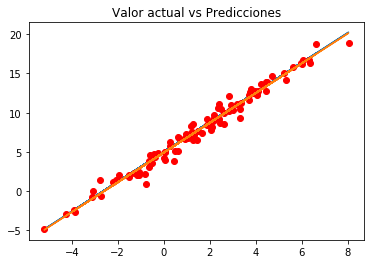

In [246]:
plt.plot(data.Predictores, data.Predicciones)
plt.plot(data.Predictores, data.Etiqueta, 'ro')
plt.plot(data.Predictores, data.y_model)
plt.title("Valor actual vs Predicciones")

# Error standar de los residuos (RSE)

Entre menor sea el RSE, mejor sera el modelo

In [248]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7634644092354506

In [250]:
#Un 9% de error
RSE / np.mean(data.Etiqueta)

0.09804757074505945